Before we build models, we should know to measure the accuaracy of predictions
### Forecast quality metrics

List of meterics:
<p>
    <li><a  href="https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination">R squared</a></li>
    <li><a  href="https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error">Mean Absolute Error</a></li>
    <li><a  href="https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error">Median Absolute Error</a></li>
    <li><a  href="https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error">Mean Squared Error</a></li>
    <li><a  href="https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error">Mean Squared Logarithmic Error</a></li>
    <li><a  href="https://en.wikipedia.org/wiki/Mean_absolute_percentage_error">Mean Absolute Percentage Error</a></li>
</p>

It is important that we follow the steps below, before we start with our models:
1.   Import and clean the data
2.   Format the data to suit our needs: (removing any redundancies such as extra rows , columns. Extract only the features which we need.)
3.   Plot the data: (to check  if there are any missing values, any outliers
4.   Smoothing the time series)
5.   Check for stationarity, trend, seasonality, autocorrelation.


### Modelling time series

1.  Autoregressive models  AR (p)
2.  Moving Averages models MA (q)
3.  ARMA (p,q)
4.  Auto Regressive Integrated Moving Average ARIMA (p,d,q)
5.  Seasonal ARIMA = SARIMA (p,d,q)(P,D,Q,s)

>p is the order of the AR term\
q is the order of the MA term\
d is the number of differencing required to make the time series stationary.
If the series is already stationary d=0


### AR models
Regression of the time series onto itself. 
It uses the past values to predict the current value
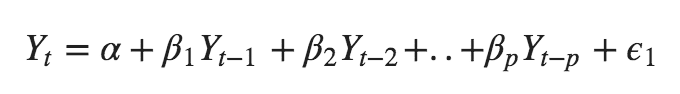


### MA models
It uses the past forecast error to get the current value
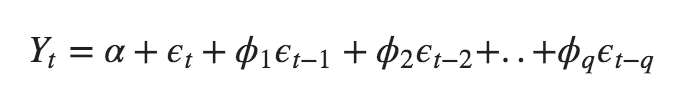


### ARIMA
Series is differenced at least once and the AR and MA terms are combined to give Yt

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)


### How to determine d?
The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


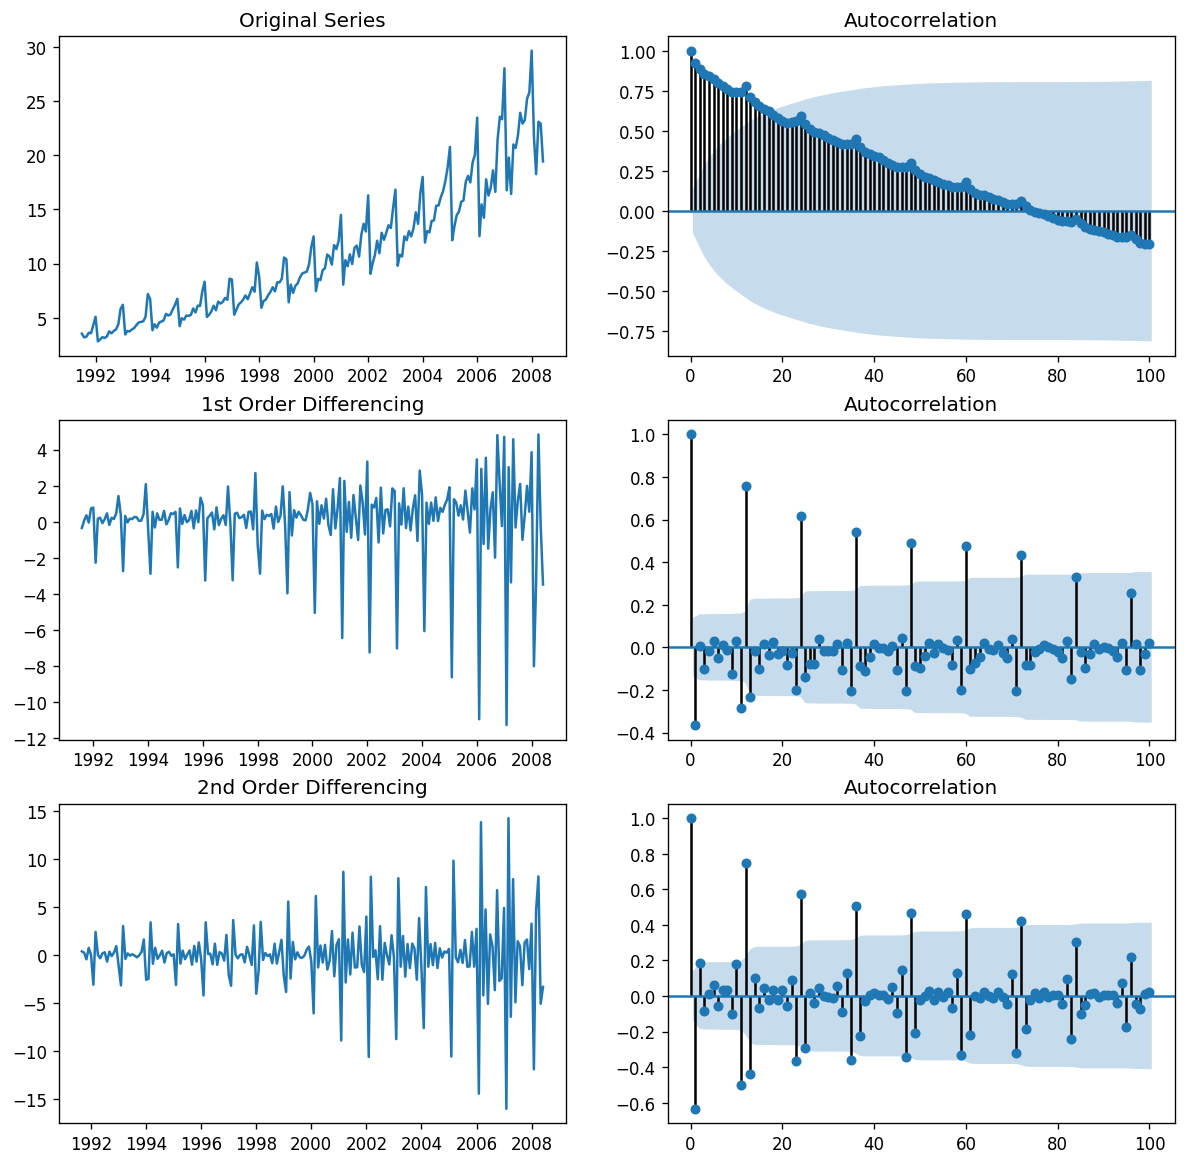

In [3]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('drive/My Drive/TSA/monthly_data.csv', index_col=[0], header=0,parse_dates=[0])

# Original Series
fig, axes = plt.subplots(3, 2,figsize=(12,12))
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1],lags=100)

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1],lags=100)

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1],lags=100)

plt.show()

###  How to find the order of the AR term (p)?

Through PACF! Since it gives the pure correlation between a lag and the series.We initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

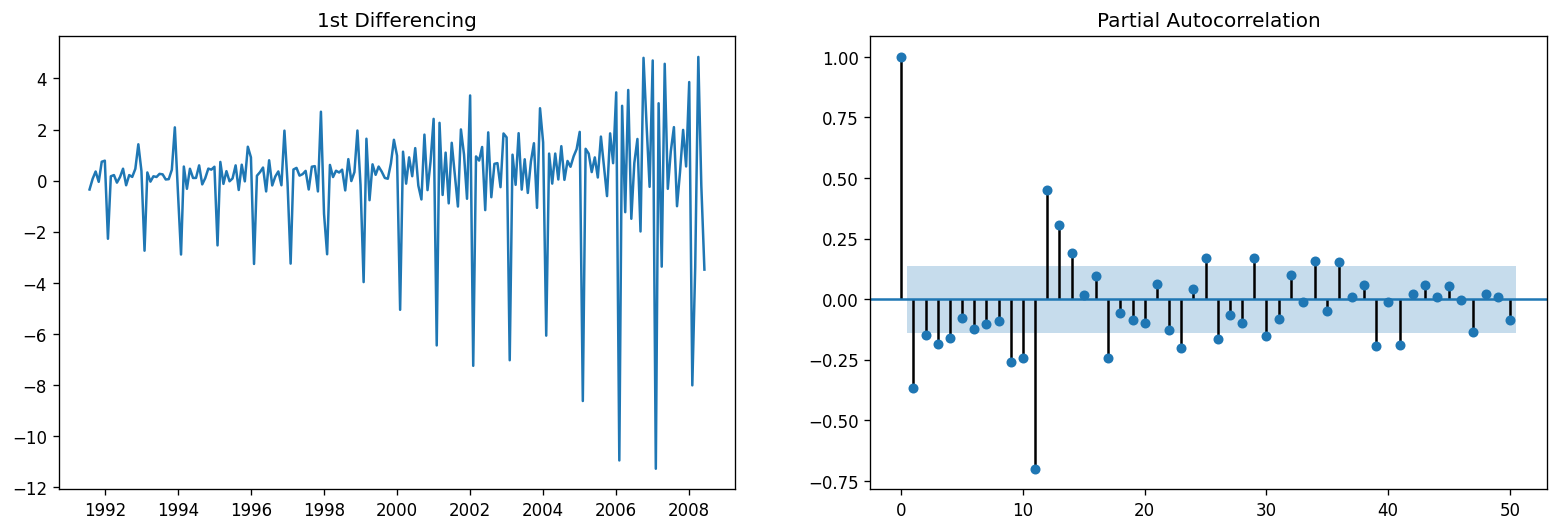

In [4]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2,figsize=(16,5))
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
plot_pacf(df.value.diff().dropna(), ax=axes[1],lags=50)

plt.show()

###  How to find the order of the MA term (q)?

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

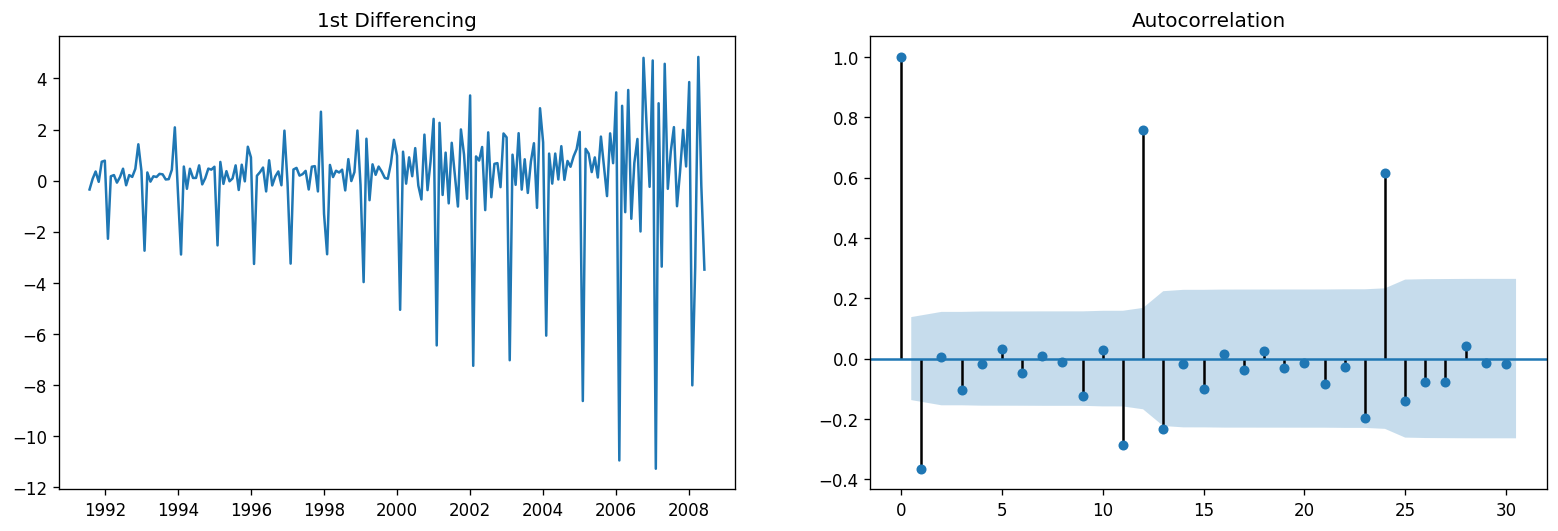

In [5]:
fig, axes = plt.subplots(1, 2,figsize=(16,5))
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1],lags=30)

plt.show()

### ARIMA model




In [7]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
# model = ARIMA(df.value, order=(1,1,1))
# model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.919
Method:                       css-mle   S.D. of innovations              1.890
Date:                Fri, 08 Jul 2022   AIC                            843.838
Time:                        03:14:18   BIC                            857.091
Sample:                    08-01-1991   HQIC                           849.200
                         - 06-01-2008                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0965      0.017      5.650      0.000       0.063       0.130
ar.L1.D.value     0.3140      0.075      4.183      0.000       0.167       0.461
ma.L1.D.value    -0.9164      0.026    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

In [8]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

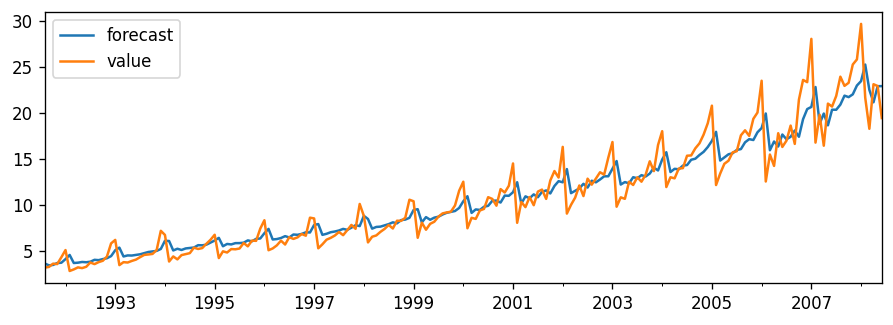

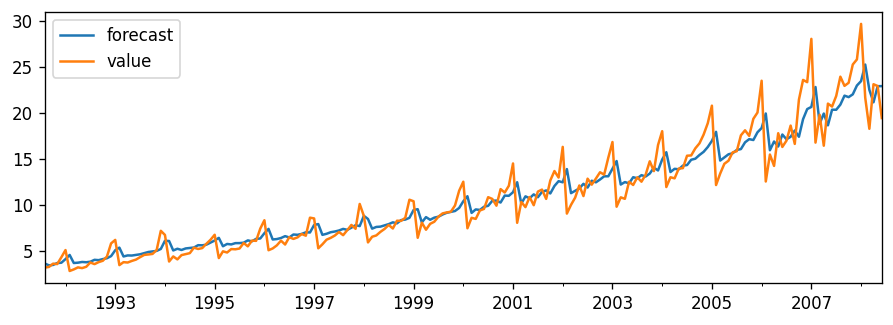

In [9]:
model_fit.plot_predict(dynamic=False)


In summary:
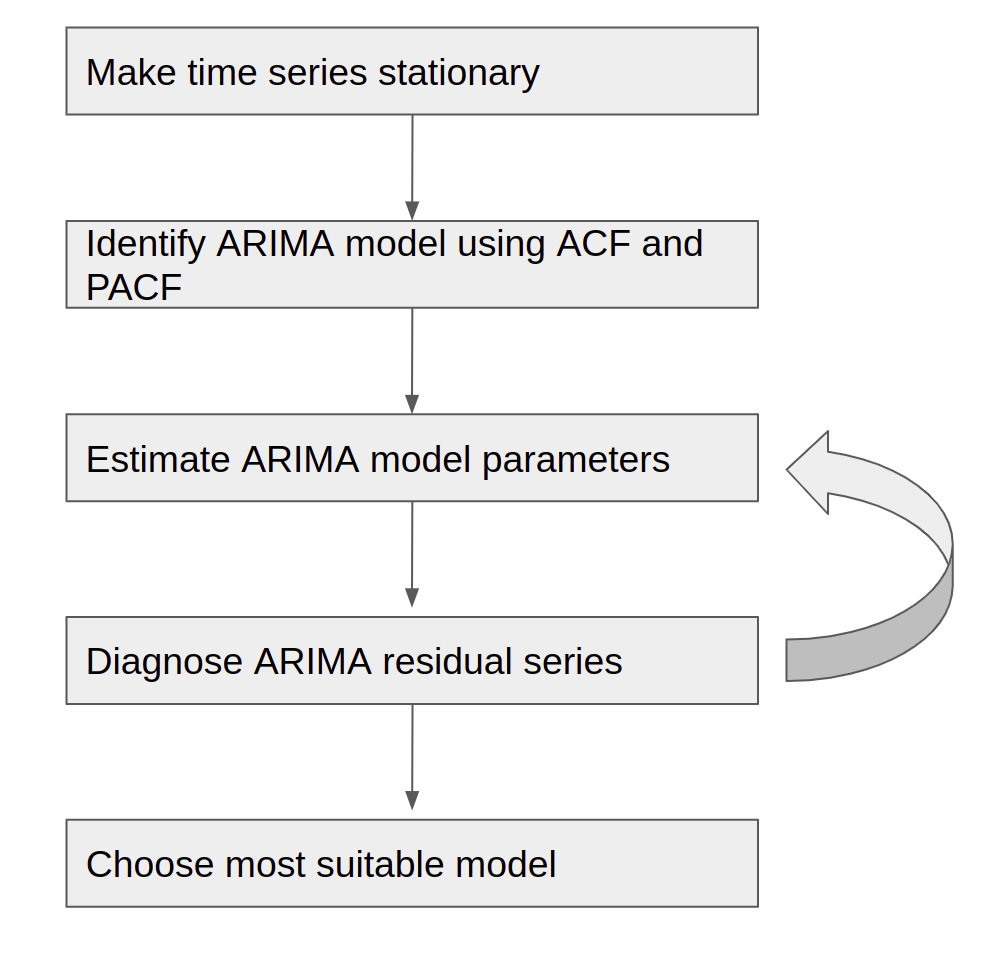

### Out-of-Time Cross validation

In [10]:
# Create Training and Test
train = df.value[:85]
test = df.value[85:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [11]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.885
Method:                       css-mle   S.D. of innovations              0.956
Date:                Fri, 08 Jul 2022   AIC                            245.771
Time:                        03:15:09   BIC                            260.284
Sample:                    09-01-1991   HQIC                           251.601
                         - 07-01-1998                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.346e-05      0.003      0.020      0.984      -0.005       0.005
ar.L1.D2.value    -0.2204      0.110     -2.008      0.048      -0.436      -0.005
ar.L2.D2.value    -0.3436      0.104